<a href="https://colab.research.google.com/github/Alfikriangelo/DeepLearningTasks/blob/main/4thWeekTask/RNN_LSTM_GRU%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import library
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

In [7]:
# Load Dataset
num_words = 40000
maxlen = 400
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [8]:
# build model
def build_model(cell_type='LSTM'):
    model = Sequential()
    model.add(Embedding(num_words, 128, input_length=maxlen))
    if cell_type == 'RNN':
        model.add(SimpleRNN(128, return_sequences=True))
        model.add(SimpleRNN(64))
    elif cell_type == 'LSTM':
        model.add(LSTM(128, return_sequences=True))
        model.add(LSTM(64))
    elif cell_type == 'GRU':
        model.add(GRU(128, return_sequences=True))
        model.add(GRU(64))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Persamaan Matematika Model RNN, LSTM, dan GRU

---

### Recurrent Neural Network (RNN)

RNN menggunakan hidden state yang di-*loop* di setiap langkah waktu:

$$
h_t = \tanh(W_{xh} x_t + W_{hh} h_{t-1} + b_h)
$$

$$
y_t = \sigma(W_{hy} h_t + b_y)
$$

**Penjelasan:**
$$
x_t: \text{ input pada waktu ke-}t \\
h_t: \text{ hidden state saat ini} \\
h_{t-1}: \text{ hidden state sebelumnya} \\
W_{xh}, W_{hh}, W_{hy}: \text{ matriks bobot} \\
b_h, b_y: \text{ bias} \\
\tanh: \text{ fungsi aktivasi non-linear} \\
\sigma: \text{ sigmoid (untuk output klasifikasi)}
$$

---

### Long Short-Term Memory (LSTM)

LSTM menyimpan informasi jangka panjang dan pendek menggunakan memori sel:

$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) \quad \text{(forget gate)}
$$

$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) \quad \text{(input gate)}
$$

$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C) \quad \text{(candidate value)}
$$

$$
C_t = f_t \ast C_{t-1} + i_t \ast \tilde{C}_t \quad \text{(cell state)}
$$

$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) \quad \text{(output gate)}
$$

$$
h_t = o_t \ast \tanh(C_t)
$$

**Penjelasan:**
$$
f_t: \text{ gerbang pelupa} \\
i_t: \text{ gerbang input} \\
\tilde{C}_t: \text{ kandidat memori baru} \\
C_t: \text{ memori sel} \\
o_t: \text{ gerbang output} \\
h_t: \text{ hidden state} \\
\ast: \text{ perkalian elemen-wise}
$$

---

### Gated Recurrent Unit (GRU)

GRU menyederhanakan LSTM dengan menggabungkan memori dan hidden state:

$$
z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z) \quad \text{(update gate)}
$$

$$
r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r) \quad \text{(reset gate)}
$$

$$
\tilde{h}_t = \tanh(W_h \cdot [r_t \ast h_{t-1}, x_t] + b_h) \quad \text{(candidate hidden state)}
$$

$$
h_t = (1 - z_t) \ast h_{t-1} + z_t \ast \tilde{h}_t
$$

**Penjelasan:**
$$
z_t: \text{ gerbang pembaruan (berapa banyak informasi lama dipertahankan)} \\
r_t: \text{ gerbang reset (mengontrol pelupaan informasi sebelumnya)} \\
\tilde{h}_t: \text{ kandidat hidden state baru} \\
h_t: \text{ hidden state akhir}
$$

---

### Catatan Tambahan

- Semua model ini dipakai untuk memproses urutan (teks, sinyal, dsb).  
- **LSTM** dan **GRU** mengatasi kelemahan **RNN** dalam menghadapi *vanishing gradient* melalui mekanisme gerbang.


In [10]:
# Train and Evaluate Models
results = {}
for model_type in ['RNN', 'LSTM', 'GRU']:
    print(f"\nTraining {model_type} model...")
    model = build_model(model_type)
    history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=1)
    preds = model.predict(x_test).ravel()
    y_pred = (preds > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, preds)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(f"AUC: {auc:.4f}")

    # Save results
    results[model_type] = {
        "model": model,
        "history": history,
        "y_pred": y_pred,
        "y_prob": preds,
        "auc": auc
    }


Training RNN model...
Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.5031 - loss: 0.7102 - val_accuracy: 0.5062 - val_loss: 0.6976
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.5115 - loss: 0.7047 - val_accuracy: 0.5050 - val_loss: 0.6987
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.5008 - loss: 0.7055 - val_accuracy: 0.5054 - val_loss: 0.6951
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step
Accuracy: 0.5011
              precision    recall  f1-score   support

           0       0.50      0.95      0.66     12500
           1       0.51      0.05      0.10     12500

    accuracy                           0.50     25000
   macro avg       0.51      0.50      0.38     25000
weighted avg       0.51      0.50      0.38     25000

AUC: 0.5360

Training LSTM model...
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.6679 - loss: 0.5834 - val_accuracy: 0.8242 - val_loss: 0.3810
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9070 - loss: 0.2446 - val_accuracy: 0.8624 - val_loss: 0.3493
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9535 - loss: 0.1335 - val_accuracy: 0.8714 - val_loss: 0.3307
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step
Accuracy: 0.8580
              precision    recall  f1-score   support

           0       0.88      0.83      0.85     12500
           1       0.84      0.88      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

AUC: 0.9300

Training GRU model...
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.6473 - loss: 0.5982 - val_accuracy: 0.8494 - val_loss: 0.3502
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.9027 - loss: 0.2559 - val_accuracy: 0.8504 - val_loss: 0.3788
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9507 - loss: 0.1433 - val_accuracy: 0.8344 - val_loss: 0.3901
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step
Accuracy: 0.8231
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     12500
           1       0.89      0.74      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000

AUC: 0.9183


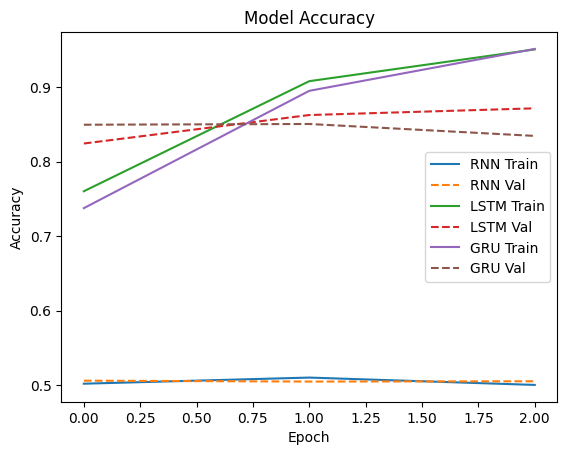

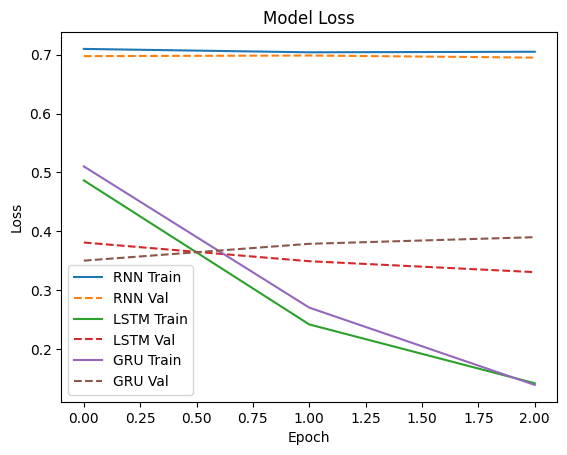

In [11]:
# Plotting
for name, res in results.items():
    plt.plot(res['history'].history['accuracy'], label=f'{name} Train')
    plt.plot(res['history'].history['val_accuracy'], linestyle='--', label=f'{name} Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

for name, res in results.items():
    plt.plot(res['history'].history['loss'], label=f'{name} Train')
    plt.plot(res['history'].history['val_loss'], linestyle='--', label=f'{name} Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Hasil Evaluasi Model Deep Learning pada Dataset IMDB

| Model | Akurasi | Presisi | Recall | F1-Score | AUC |
|-------|---------|---------|--------|----------|------|
| **RNN**  | 0.5011  | 0.51 (avg) | 0.50 (avg) | 0.38 (avg) | 0.5360 |
| **LSTM** | 0.8580  | 0.86 (avg) | 0.86 (avg) | 0.86 (avg) | 0.9300 |
| **GRU**  | 0.8231  | 0.83 (avg) | 0.82 (avg) | 0.82 (avg) | 0.9183 |

---

## Analisis

- **RNN**:
  - Performa sangat rendah, hampir seperti tebakan acak (random guess).
  - F1-Score dan AUC sangat buruk, menandakan kurang mampu menangkap konteks sekuensial.
  - Cenderung gagal karena *vanishing gradient problem* pada data teks panjang.

- **LSTM**:
  - Performa terbaik di semua metrik.
  - Akurasi dan AUC tinggi menandakan model sangat baik dalam memahami konteks teks.
  - Cocok untuk data sekuensial panjang seperti ulasan film.

- **GRU**:
  - Kinerja mendekati LSTM, dengan hasil cukup memuaskan.
  - Lebih ringan dari LSTM, cocok jika butuh efisiensi dengan akurasi sedikit lebih rendah.

---

## Kesimpulan

Model **LSTM** adalah yang paling optimal untuk analisis sentimen pada dataset IMDB ini, dengan akurasi dan AUC tertinggi. **GRU** juga memberikan performa baik dengan arsitektur yang lebih ringan. Sebaliknya, model **RNN standar** tidak direkomendasikan untuk tugas ini karena performa yang sangat rendah.

